### Fighting Obesity in Toronto : Opening Gyms in At-Risk Reighborhoods ###

In [134]:
import numpy as np
from builtins import str

In [205]:
!conda install -c conda-forge geocoder --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/yacine/miniconda2/envs/p36workshop

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

  geocoder           conda-forge/noarch::geocoder-1.38.1-py_1
  ratelim            conda-forge/noarch::ratelim-0.1.6-py_2



ratelim-0.1.6        | 6 KB      | ##########################

In [355]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import math
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt

In [2]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
!conda install -c conda-forge folium --yes
import folium

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [206]:
import geocoder

###  Build the dataframe containing health data ###

In [313]:
# Importing Health data from Urban Health dataset 
health_df = pd.read_excel('UrbanHeart_MatrixData.xlsx')

In [314]:
health_df.columns

Index(['N ID', 'Neighborhood', 'Unemployment', 'Low Income',
       'Social Assistance ', 'High School Graduation', ' Marginalization',
       'Post Secondary Completion', 'Municipal Voting V1',
       'Community Places for Meeting', 'Walk score', 'Healthier Food Stores',
       'Green Space', 'Premature Mortality', 'Mental Health',
       ' Preventable Hospitalizations ACSCH V2', 'Diabetes', 'R', 'Y', 'G'],
      dtype='object')

In [315]:
# we keep only the walk score and diabetes columns

In [316]:
health_df = health_df[['Neighborhood','Walk score','Diabetes']]

In [317]:
health_df['Diabetes'].replace('(H|L)','',regex=True,inplace=True)

### Getting Localisation data from geopy ###

In [321]:
geolocator = Nominatim(user_agent="toronto_explorer")
Lat = []
Long = []
for neighb in health_df['Neighborhood']:
    address = neighb
    location = geolocator.geocode(address,country_codes='CA')
    if (location is not None):
        location = geolocator.geocode(address,country_codes='CA')
        Lat.append(location.latitude)
        Long.append(location.longitude)
    else:
        Lat.append(float('nan'))
        Long.append(float('nan'))

In [323]:
health_df['Latitude'] = Lat
health_df['Longitude'] = Long

### Cleaning up dataset  ###

In [324]:
health_df.dropna(inplace = True)

In [325]:
health_df['Diabetes']= health_df['Diabetes'].astype('float')

In [333]:
health_df.head()

,Neighborhood,Walk score,Diabetes,Latitude,Longitude
0,Agincourt North,66.0,9.5,43.808038,-79.266439
2,Alderwood,70.0,8.5,43.601717,-79.545232
3,Annex,94.0,5.5,43.670338,-79.407117
4,Banbury-Don Mills,67.0,6.5,43.751672,-79.370169
5,Bathurst Manor,61.0,8.5,43.665519,-79.411937


### Getting location data using Foursquare API ###

In [ ]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Toronto are {}, {}.'.format(latitude, longitude))


In [ ]:
# We're going to visualize the map of Toronto and its neighborhoods
# Creating the map of Toronto
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for latitude, longitude, borough, neighbourhood in zip(df_2['Latitude'], df_2['Longitude'], df_2['Borough'], df_2['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(map_Toronto)  

In [ ]:
map_Toronto

In [460]:
#Initializing Foursquare API Credentials
CLIENT_ID = 'RF2HLDBFJ0Z0IAOHHOTQG4CMUCDM0RGVAF3DVCQFD153FMOB'
CLIENT_SECRET = '2LYBEQRR5TXMPQWUFKMLWCIKWVOA2G3U3Y1YCYL20MWXKRHJ'
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [466]:
#get number of gyms, parks, pools, and fast food restaurants nearby each neighborhood 

Nb_Gyms = []
Nb_Parks =[]
Nb_FF  = []
Nb_Pools = []
radius = 500
for name, lat, lng in zip(health_df['Neighborhood'],health_df['Latitude'],health_df['Longitude']):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION, 
             lat, 
             lng, 
             radius, 
             LIMIT,
            "gym") 
#         # make the GET request
        results_gym = requests.get(url).json()
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            "park") 
        # make the GET request
        results_park = requests.get(url).json()
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION, 
             lat, 
             lng, 
             radius, 
             LIMIT,
             "pool") 
        # make the GET request
        results_pool = requests.get(url).json()
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION, 
             lat, 
             lng, 
             radius, 
            LIMIT,
            "fast food") 
        results_fastfood = requests.get(url).json()
        Nb_Gyms.append(results_gym['response']['totalResults'])
        Nb_Parks.append(results_park['response']['totalResults']) 
        Nb_FF.append(results_fastfood['response']['totalResults']) 
        Nb_Pools.append(results_pool['response']['totalResults']) 
health_df['Gyms'] = Nb_Gyms
health_df['Parks'] = Nb_Parks
health_df['FastFood'] = Nb_FF
health_df['Pools'] = Nb_Pools
 

In [467]:
health_df.head()

,Neighborhood,Walk score,Diabetes,Latitude,Longitude,Gyms,Parks,FastFood,Pools
0,Agincourt North,66.0,9.5,43.808038,-79.266439,0,0,4,0
2,Alderwood,70.0,8.5,43.601717,-79.545232,1,0,1,1
3,Annex,94.0,5.5,43.670338,-79.407117,3,3,4,1
4,Banbury-Don Mills,67.0,6.5,43.751672,-79.370169,0,1,0,0
5,Bathurst Manor,61.0,8.5,43.665519,-79.411937,7,2,5,1


In [468]:
#scaling walk score for each neighborhood  so that all features are of order ~=1
health_df['Walk score'] = health_df['Walk score']/10


### Clustering Neighborhoods###

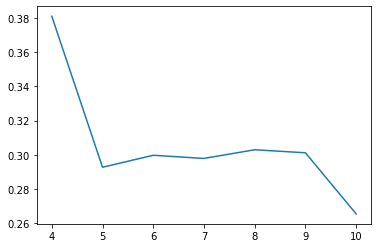

In [482]:
#Determining optimal number of clusters using silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

health_df_clustering = health_df.drop(['Neighborhood','Latitude','Longitude'],1)
scores = []
for kclusters in range(4,11):
    predictions = KMeans(n_clusters=kclusters).fit_predict(health_df_clustering)
    scores.append(silhouette_score(health_df_clustering,predictions))
plt.plot(range(4,11),scores)

,Walk score,Diabetes,Gyms,Parks,FastFood,Pools
0,6.6,9.5,0,0,4,0
2,7.0,8.5,1,0,1,1
3,9.4,5.5,3,3,4,1
4,6.7,6.5,0,1,0,0
5,6.1,8.5,7,2,5,1
...,...,...,...,...,...,...
135,8.6,8.1,4,0,4,0
136,8.9,4.8,9,1,13,2
137,8.4,4.2,6,2,7,1
138,6.0,10.4,2,0,4,0


In [508]:
#Selecting optimal cluster number
kclusters = 3

In [509]:
# Building and Fitting K-means model 
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(health_df_clustering)

In [510]:
# Add clustering labels
health_df.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [ ]:
health_df['Walk score'] = health_df['Walk score']*10
health_df.head()

### Results ###

In [512]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# Visualising Clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(health_df['Latitude'], health_df['Longitude'], health_df['Neighborhood'], health_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [500]:
#Examining Cluster 1 
C = health_df.loc[health_df['Cluster Labels'] == 0,health_df.columns[[1,2,3,6,7,8,9]]]
print('Cluster 1 ')
print(C.mean(0,numeric_only=True))

Cluster 1 
Walk score    70.662651
Diabetes       9.061446
Gyms           0.457831
Parks          0.843373
FastFood       1.156627
Pools          0.144578
dtype: float64


In [428]:
#Examining Cluster 2
C = health_df.loc[health_df['Cluster Labels'] ==1,health_df.columns[[1,2,3,6,7,8,9]]]
print('Cluster 2 ')
print(C.mean(0,numeric_only=True))

,Neighborhood,Walk score,Diabetes,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Alderwood,70.0,8.5,43.601717,-79.545232,1,Pizza Place,Coffee Shop,Pub,Gym,Pharmacy,Sandwich Place,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market
2,Annex,94.0,5.5,43.670338,-79.407117,1,Pizza Place,Thai Restaurant,Bistro,Park,Indian Restaurant,Concert Hall,Metro Station,Korean Restaurant,Bookstore,Burrito Place
3,Banbury-Don Mills,67.0,6.5,43.751672,-79.370169,1,Park,Cafeteria,Pool,Soccer Field,Women's Store,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant
4,Bathurst Manor,61.0,8.5,43.665519,-79.411937,1,Korean Restaurant,Grocery Store,Coffee Shop,Ice Cream Shop,Mexican Restaurant,Café,Bar,Japanese Restaurant,Bakery,Eastern European Restaurant
5,Bay Street Corridor,99.0,5.1,43.672798,-79.390734,1,Italian Restaurant,Boutique,Spa,French Restaurant,Clothing Store,Coffee Shop,Cosmetics Shop,Restaurant,Hotel,Café
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Woodbine Corridor,85.0,7.6,43.698494,-79.309395,1,Park,Skating Rink,Athletics & Sports,Convenience Store,Curling Ice,Fish Market,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field
96,Woodbine-Lumsden,73.0,8.1,43.693740,-79.311251,1,Convenience Store,Beer Store,Spa,Curling Ice,Video Store,Park,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
97,Wychwood,86.0,8.1,43.682122,-79.423839,1,Italian Restaurant,Coffee Shop,Ice Cream Shop,Restaurant,Sushi Restaurant,Pizza Place,Bakery,Indian Restaurant,Light Rail Station,Café
98,Yonge-Eglinton,89.0,4.8,43.706748,-79.398327,1,Coffee Shop,Italian Restaurant,Pub,Restaurant,Fast Food Restaurant,Bookstore,Movie Theater,Middle Eastern Restaurant,Arts & Crafts Store,Bakery


In [501]:
#Examining Cluster 3
C = health_df.loc[health_df['Cluster Labels'] ==2,health_df.columns[[1,2,3,6,7,8,9]]]
print('Cluster 3 ')
print(C.mean(0,numeric_only=True))

Cluster 3 
Walk score    82.250000
Diabetes       7.445833
Gyms           4.416667
Parks          2.458333
FastFood       5.333333
Pools          0.833333
dtype: float64


In [502]:
#Examining Cluster 4
C = health_df.loc[health_df['Cluster Labels'] ==3,health_df.columns[[1,2,3,6,7,8,9]]]
print('Cluster 4 ')
print(C.mean(0,numeric_only=True))

Cluster 4 
Walk score    93.666667
Diabetes       6.200000
Gyms          22.333333
Parks          6.333333
FastFood       9.666667
Pools          6.000000
dtype: float64
